# Statistics

## The problem 

You are a data scientist in [booking.com](https://www.booking.com/). You are in charge on developing models to increase the conversion rates of users. The competition is fierce, but your company is the market leader and you are proud to be a part of the essential data science team which is involved in the core of the buisness.  One day, Your CEO is informing you that a new, start-up company, achieves siginifacntly higher conversion rates, and that the company is contemplating buying it. He ask you to plan an accurate experiment to evalute the lift in conversion rate if the start-up would be bought and integrated in the company.  


Design such plan. Consider:
* What inputs you need or missing
* What is the correct methodoligy to apply to fair test the two systems? 
* What are the needed confidance parameters? 

## Common distributions

### The normal distribution

<font size=3 color='red'><b>Exercise: Plot a normal distribution with mean 2 and variance 1 </b></font>

In [1]:
import plotly_express as px
import numpy as np
import scipy.stats as stats
import math
import pandas as pd

In [144]:
def calculate_normal_density_distribution(mu, sigma, n_points=100):
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, n_points)
    return pd.DataFrame({'x': x, 'y': stats.norm.pdf(x, loc=mu, scale=sigma)})
    
def sample_from_normal_distribution(mu, sigma, n_samples=100):
    import numpy as np
    return pd.DataFrame({'sample': np.random.normal(loc=mu, scale=sigma, size=n_samples)})
    

In [3]:
import ipywidgets as widgets

In [4]:
mu_slider = widgets.IntSlider(
    value=0,
    min=-5,
    max=5,
    step=1,
    description='Mu:'
)

var_slider = widgets.FloatSlider(
    min=0.2,
    max=4.0,
    step=0.4,
    value=1.,
    description='Variance:'
)

In [5]:
@widgets.interact
def plot_normal_distribution(mu = mu_slider, variance=var_slider):
    sigma = math.sqrt(variance)
    density = calculate_normal_density_distribution(mu, sigma)
    samples = sample_from_normal_distribution(mu, sigma ,100)
    
    fig = px.line(density, x='x', y='y', range_x=(-10,10), range_y=(0,1))
    fig.update_traces(line=dict(color="yellow", width=3))

    fig.add_trace(px.histogram(samples, x='sample', histnorm='probability density').data[0])
    return fig.update_layout(title_text=f"Normal distribution with average of {mu} and variance of {variance}", title_x=0.5)
    

interactive(children=(IntSlider(value=0, description='Mu:', max=5, min=-5), FloatSlider(value=1.0, description…

**Main Characteristics of Normal Distribution:**

* Names - Gaussian, Normal, Bell distribution
* Symmetrical to the mean
* Mean, Median and Mode are the same
* Standard normal distribution has a mean on 0 and standard deviation on 1.
  * Transforming a normal distribution to a standard distribiution can be done by substracting the mean and dividing by the standard deviation.
  * This process of converting a raw score into a standard score is called standardizing or normalizing

**More Characteristics** - From the image below, we can see that:

* 68.3% of the data is within 1 standard deviation (σ) of the mean (μ)
* 95.4% of the data is within 2 standard deviations (σ) of the mean (μ)
* 99.7% of the data is within 3 standard deviations (σ) of the mean (μ).

![alt text](https://libapps-au.s3-ap-southeast-2.amazonaws.com/accounts/202269/images/Histogram_Normal_Distribution.png)

### Z-Score and standarizations

The Z-score, AKA standard score, is the number of standard deviations a given data point lies above or below the mean. to calculate the Z-score, subtract the mean from each of the individual data points and divide the result by the standard deviation:

$$\Large{z={x-\mu  \over \sigma }}$$



<font size=3 color='red'><b>Exercise 2: Sample 1000 samples from a normal distribution with mean 2 variance 0.5. Verify the stats. Apply standartization and verify the data was indeed standardized </b></font>

In [6]:
def standarize_value(val, mu, variance):
    return (val - mu) / math.sqrt(variance)

In [7]:
theortical_standard_distribution = calculate_normal_density_distribution(mu=0, sigma=1)

In [13]:
mu = 2
variance = 0.5
sigma = math.sqrt(variance)
normal_samples = sample_from_normal_distribution(mu, sigma, n_samples=100000)
normal_samples['type'] = 'Non Standard'

standarized_samples = normal_samples.copy()
standarized_samples['sample'] = standarized_samples['sample'].apply(lambda val: standarize_value(val, mu, variance))
standarized_samples['type'] = 'Standard'

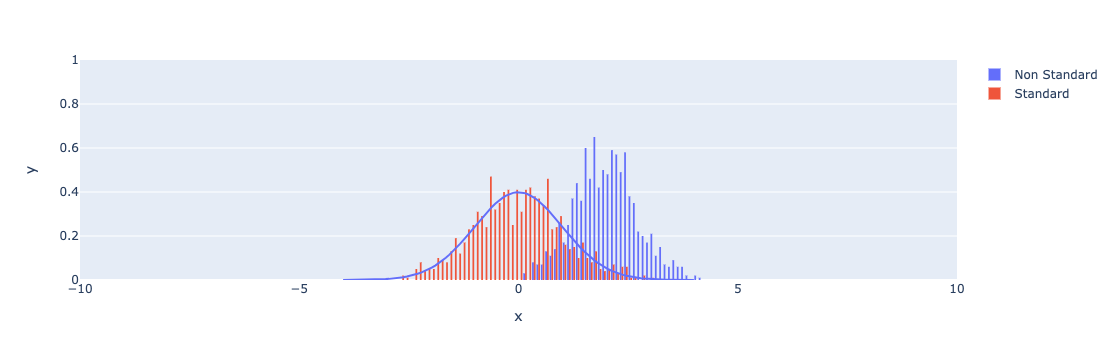

In [145]:
fig = px.line(theortical_standard_distribution, x='x', y='y', range_x=(-10,10), range_y=(0,1))
hist_fig = px.histogram(normal_samples.append(standarized_samples), x='sample', color='type', histnorm='probability density', nbins=100)
fig.add_trace(hist_fig.data[0])
fig.add_trace(hist_fig.data[1])

<font size=3 color='red'><b>Exercise: Verify that indeed 95.4% of the data fall between two standard deviations from the mean (Use either the standard or the non standard samples)</b></font>

In [15]:
mu, sigma = normal_samples['sample'].mean(), normal_samples['sample'].std()
lower_bound, upper_bound = mu - 2*sigma, mu + 2*sigma

In [16]:
normal_samples.query('sample > @lower_bound and sample < @upper_bound').shape[0] / normal_samples.shape[0]

0.946

In [17]:
normal_samples.query(f'sample > {lower_bound} and sample < {upper_bound}').shape[0] / normal_samples.shape[0]

0.946

### Bernoulli distribution

The Bernoulli distribution is a discrete probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q=1-p$.
Less formally, it can be thought of as a model for the set of possible outcomes of any single experiment that asks a yes–no question.

Some characteristics:
* The Bernoulli distribution is a special case of the binomial distribution where a single trial is conducted
* Values are only 1 (Success) or 0 (Failure)
* The mean of the distribution is $p$, i.e, if X is a random varialbe who is bernoulli distributed, $E[X]=p$
* The variance of the distribution is $p*(1-p)$, i.e, if X is a random varialbe who is bernoulli distributed, $V[X]=p*(1-p)$


<font size=3 color='red'><b>Exercise: Sample 100 values from a bernoulli distribution with parameter $p$=0.5.</b></font>

<font size=2 color='red'><b> Hint: you can use np.random.rand(100) < head_prob) to decide the heads in one trail</b></font>

In [137]:
head_prob = 0.5
n_samples = 100
bernoulli_sample = pd.DataFrame({'sample_result':np.random.rand(n_samples) < head_prob, 
                                 'sample_id':range(n_samples)})
bernoulli_sample.sample_result = bernoulli_sample.sample_result.map({True:1, False:0})

In [139]:
bernoulli_sample.sample_result.head(10)

0    1
1    0
2    1
3    1
4    1
5    1
6    1
7    0
8    0
9    0
Name: sample_result, dtype: int64

In [140]:
bernoulli_sample.sample_result.value_counts()

0    50
1    50
Name: sample_result, dtype: int64

In [153]:
bernoulli_sample.sample_result.describe().loc[['mean','std']]

mean    0.500000
std     0.502519
Name: sample_result, dtype: float64

**Why is bernoulli distribution important?**

We encounter bernoulli variables in all binary classificatin problems:
* An ad can either be clicked or not clicked, thus an ad click through rate is a bernoully parameter
* A model can output the correct or incorrect result, thus the model output success rate is a a bernoully parameter
* A new drug can be either improve or not improve a patient state

When ever we need to calculate success rate, we are calculating a bernoulli distribution parameter. 

## Estimation of population statistics

Since we usually don't have access to the entire population, we use data samples to estimate population statistics (e.g. mean & variance). For example, imagine that you've trained a model to output the name of an actor given his photo. The model accuracy over the entire population of actors photos is probabliy not available to you (try to think why). To estimate the model accuracy, you'll have to relay on samples of the population. 

### Central limit theory

No matter the distribution of the population (be it binomial, uniform etc.) the sampling distriubion of the mean will approximate a normal distribution with a mean equal to the population mean and a variance which get smaller and smaller the more samples we take. So if we sample from any distribution with population mean $\mu$ and standard deviation $\sigma$, the average (mean) of the sample, denoted by $\bar{x}$, is **normally distributed** :

$$
\Large {\bar{x} \sim \mathcal{N}(\mu,\,\dfrac{\sigma^{2}}{n} )\,}
$$

The standard deveation of the estimated mean, $\dfrac{\sigma}{\sqrt{n}}$,  is called **The Standard Error** and is sometimes denoted **SE**.

The central limit theorem is the most important discovery of modern statictics. Why? It allows us to make **quantitive decisions** regarding means of competing methods using normal distribution calculations, **even if the underlying distributions are not normal.** 

<font size=3 color='red'><b>Exercise: Simulate 1000 trails of 100 tosses of a coin with a head probability of 0.6. For each 100 tosses, compute the head probability. Plot the distribution of the resulted 1000 trails</b></font>

In [40]:
head_prob = 0.6
n_trails = 1000
n_tosses = 100
trails_head_probs = []
for _ in range(n_trails):    
    trail_head_prob = sum(np.random.rand(100) < head_prob) / 100
    trails_head_probs.append(trail_head_prob)        

In [41]:
len(trails_head_probs)

1000

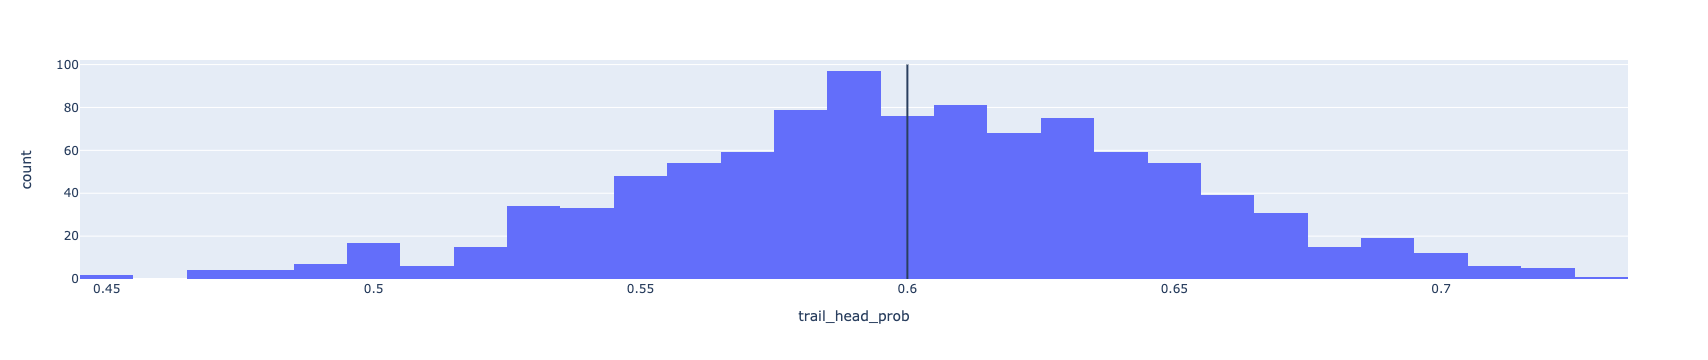

In [42]:
results = pd.DataFrame({'trail_head_prob':trails_head_probs, 'trail_id':range(n_trails)})
px.histogram(results, x='trail_head_prob').update_layout(shapes=[dict(type='line', x0=head_prob, x1=head_prob, y0=0, y1=100)])

<font size=3 color='red'><b>Exercise: Ensure that the estimation standard deveation agrees with the theorictal standard error</b></font>

Reminedr: the theoretical standard error is $\dfrac{\sigma}{\sqrt{n}}$. In our case, the distribution in hand is a bernoulli distribution with succes probability $p$ of 0.6. For bernoulli distributions:

* The mean is $p$ - in our case, 0.6
* The variance is $p(1-p)$ and the standard devation - $\sqrt{p(1-p)}$ - which in our case is 0.0024 and 0.489 accordingly
* The expected standard error when estimating $p$ with 100 values is $\dfrac{0.489}{10}$ or 0.0489

In [43]:
results.trail_head_prob.std()

0.048097461115590684

### Types of estimations 

There are two types of estimations:

* Point estimation - in which the estimation result is a number (scalar)
* Interval estimation - in which the estimation if an interval i.e. a range of possible values.
  * The range upper and lower bounds is detrmined by the desired confidance level, denoted as $\alpha$
  * The point estimation will be in the center of the confidance interval
  
  
<span style="font-size:larger;">**An interval estimation is a more informavite and actionable estimate, therefore, we will always prefer to use it over a point estimate.**</span>

![text](https://i1.wp.com/itfeature.com/wp-content/uploads/2019/07/ci11.png?w=644&ssl=1)  

<font size=3 color='red'><b>Exercise: Consider 2 ads with the same click through rate (CTR) of 10%. One was listed 1000 times and was clicked 100 times, the other listed 10 times and was clicked one time. Which one would you prefer to present? are they equally profitable? </b></font>

## Confidance intervals

Let's talk about confidance levels. When estimating population means using an interval estimation, we define a confidance level to the interval. A the higher the confidance level (e.g. 95%, 99%), the wider the interval will be. High certainty result in a wide interval, and vice versa.

The confidance level is denoted $1-\alpha$:
* A confidance level of 90% - $\alpha$=0.1
* A confidance level of 95% - $\alpha$=0.05
* A confidance level of 99% - $\alpha$=0.01


Using the central limit theorm, we can derive that a confidance interval for the population mean based on the sample mean, the standard error and a desired confidance level using the formula:

$$ \Large  CI_{1-\alpha} = [\bar{x} -Z_{\frac{\alpha}{2}}*\dfrac{\sigma}{\sqrt{n}},\quad \bar{x} +Z_{\frac{\alpha}{2}}*\dfrac{\sigma}{\sqrt{n}}]$$

Or alternativly:

$$\Large   CI_{1-\alpha} = \bar{x} \pm{(Z_{\frac{\alpha}{2}}*\dfrac{\sigma}{\sqrt{n}})}$$

Where $Z_{\frac{\alpha}{2}}$ is the needed amount of standard deviations according to the needed interval. We've already seen that:

* For a 95.4% interval (i.e. alpha = 0.046) the number of standard deviations from the mean is 2, i.e. $Z_{\frac{0.046}{2}}$ = 2
* For a 99.7% interval (i.e. alpha = 0.003) the number of standard deviations from the mean is 2, i.e. $Z_{\frac{0.003}{2}}$ = 3

<font size=3 color='red'><b>Exercise: Find a python function that returns the appropriate $Z_{\frac{\alpha}{2}}$ given a condifdance level $\alpha$. Verify the function correctness using the numbers above </b></font>

In [53]:
from scipy import stats

alpha = 0.046
n_sided = 2 
z_crit = stats.norm.ppf(1-alpha/n_sided)
print(z_crit) 

1.9953933101678245


<font size=3 color='red'><b>Exercise:</b></font>

* You'll find an head_probability in the file head_probability.pkl in the data folder, load it.
* Without picking at the value, using only one trail of 100 samples, estimate the head_probalility and supply a 95% confidance interval surrounding it. 

$$\Large   CI_{1-\alpha} = \bar{x} \pm{(Z_{\frac{\alpha}{2}}*\dfrac{\sigma}{\sqrt{n}})}$$

Since we normally don't have any prior information about the population statistics (mean, variance, etc.) in particular the standrd devation we use in the formula above, we have to estimate the stanrd deviation as well from the sample:

$$\Large   CI_{1-\alpha} = \bar{x} \pm{(Z_{\frac{\alpha}{2}}*\dfrac{\bar{\sigma}}{\sqrt{n}})}$$

In [165]:
import pickle
head_prob = pickle.load(open('data/head_probability.pkl', 'rb'))

In [98]:
def estimate_head_probability(head_prob, n_samples, alpha):
    one_trail = np.random.rand(n_samples) < head_prob
    estimated_head_prob = sum(one_trail) / n_samples
    #standard_error = math.sqrt(head_prob * (1-head_prob) / n_samples)
    estimated_standard_error = math.sqrt(estimated_head_prob * (1-estimated_head_prob) / n_samples)
    z_crit = stats.norm.ppf(1-alpha/n_sided)
    confidance_interval = (estimated_head_prob - z_crit * estimated_standard_error, estimated_head_prob + z_crit * estimated_standard_error)
    return estimated_head_prob, confidance_interval

In [172]:
alpha = 0.01
estimated_head_prob, confidance_interval = estimate_head_probability(head_prob, 100, alpha)

In [173]:
print(f'True head probability (population mean): {head_prob}')
print(f'Estimated head probability using {n_samples} samples: (sample mean): {estimated_head_prob}')
print(f'An interval containing the population mean in {100 * (1-alpha)}%: {confidance_interval}')

True head probability (population mean): 0.6
Estimated head probability using 100 samples: (sample mean): 0.62
An interval containing the population mean in 99.0%: (0.4938106508359327, 0.7461893491640673)


<font size=3 color='red'><b>Exercise: Look at the standard error calculation.. Isn't something bothers you?  </b></font>

### Confidance Interval of a difference between two samples

A new, low fat diet is proposed and you are asked to demenstrated that the diet indeed works. For this, create two groups containing 100 people each. One is put on the diet (group x), the other, does not (group y). After 4 months, you observe the following numbers:
* The average whight loss on the on-diet group was 9.31kg with an sample std $\bar{s_{x}}$ of 4.67
* The average whight loss on the non on diet group was 7.4kg with a sample std $\bar{s_{y}}$ of 4.04


Is the diet effective? what is the estimated weight loss following it and what is a 95% interval in which the expected loss lies in?  

Since, according to CLT, both means are normally distributed (each with its own parametrs) than the sample mean diff between them is also normally distributed.

$$
\Large {\bar{\text{diff}} \sim \mathcal{N}(\bar{x}-\bar{y},\,\dfrac{\bar{s_{x}^{2}}}{n} + \dfrac{\bar{s_{y}^{2}}}{n})\,}
$$

So a 95% condifdance interval for the diff can be calculated as:

$\large \bar{x}-\bar{y} \pm{1.96 * \sqrt{\dfrac{\bar{s_{x}^{2}}}{n} + \dfrac{\bar{s_{y}^{2}}}{n}}}$

In [178]:
u_x, s_x = 9.31, 4.67
u_y, s_y = 7.4, 4.04
estimated_diff = u_x - u_y
n_samples = 100
z_half_alpha = 1.96

In [179]:
se = math.sqrt(s_x**2 / n_samples + s_y**2 / n_samples)
ci = (estimated_diff - z_half_alpha * se, estimated_diff + z_half_alpha * se)
print(ci)

(0.699701983807294, 3.1202980161927063)


**We conclude that the new diet is effective, as the population difference is in an interval which has a lower bound > 0**

## Test your understanding

<font size=3 color='red'><b>The CI formulas are buliding CIs around the sample mean ($\bar{x}$) while according to the central limit theorm, the sample mean distribution is centerd around the true, population mean, and from it, a CI can be built around the population mean, not the sample mean. Explain that.  </b></font>